In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("expected_ctc.csv")

In [3]:
df.shape

(25000, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    18820 non-null  obj

In [5]:
#drop the column which is not required
df.drop(['IDX'],axis=1,inplace=True)
df.drop(['Applicant_ID'],axis=1,inplace=True)


In [6]:
df.describe()

,Total_Experience,Total_Experience_in_field_applied,Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD,Current_CTC,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
count,25000.000000,25000.000000,18820.000000,17308.000000,13119.000000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000,2.500000e+04
mean,12.493080,6.258200,2002.193624,2005.153571,2007.396372,1.760945e+06,3.482040,4.089040,0.773680,0.081720,2.250155e+06
std,7.471398,5.819513,8.316640,9.022963,7.493601,9.202125e+05,1.690335,2.606612,1.199449,0.273943,1.160480e+06
min,0.000000,0.000000,1986.000000,1988.000000,1995.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.037440e+05
25%,6.000000,1.000000,1996.000000,1997.000000,2001.000000,1.027312e+06,2.000000,2.000000,0.000000,0.000000,1.306278e+06
50%,12.000000,5.000000,2002.000000,2006.000000,2007.000000,1.802568e+06,3.000000,4.000000,0.000000,0.000000,2.252136e+06
75%,19.000000,10.000000,2009.000000,2012.000000,2014.000000,2.443883e+06,5.000000,6.000000,1.000000,0.000000,3.051354e+06
max,25.000000,25.000000,2020.000000,2023.000000,2020.000000,3.999693e+06,6.000000,8.000000,5.000000,1.000000,5.599570e+06


In [7]:
#Checking For Duplicates
df.duplicated().sum()

np.int64(0)

In [8]:
#Checking for Missing Values
df.isnull().sum()

Total_Experience                         0
Total_Experience_in_field_applied        0
Department                            2778
Role                                   963
Industry                               908
Organization                           908
Designation                           3129
Education                                0
Graduation_Specialization             6180
University_Grad                       6180
Passing_Year_Of_Graduation            6180
PG_Specialization                     7692
University_PG                         7692
Passing_Year_Of_PG                    7692
PHD_Specialization                   11881
University_PHD                       11881
Passing_Year_Of_PHD                  11881
Curent_Location                          0
Preferred_location                       0
Current_CTC                              0
Inhand_Offer                             0
Last_Appraisal_Rating                  908
No_Of_Companies_worked                   0
Number_of_P

In [9]:
#Fill missing values 

#Categorical Columns

categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)



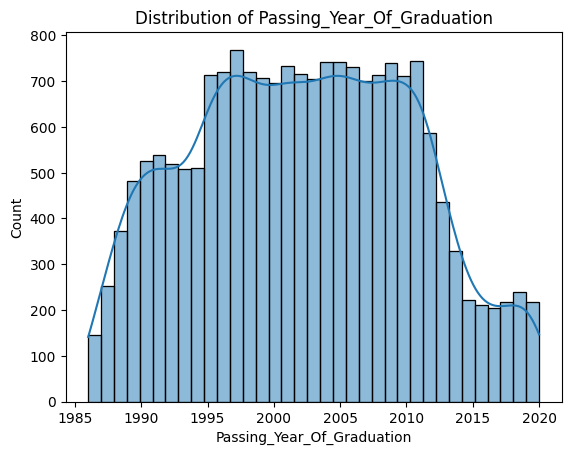

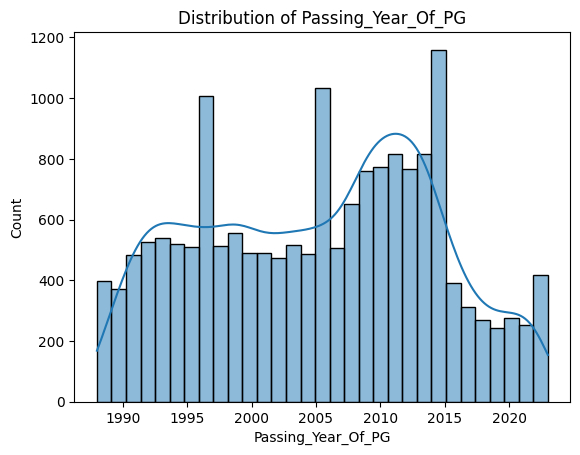

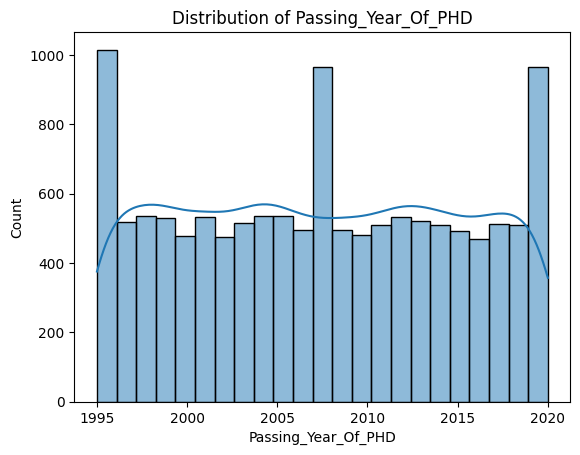

In [10]:
#Checking for skewness in numerical columns with missing values
numerical_cols = ['Passing_Year_Of_Graduation','Passing_Year_Of_PG','Passing_Year_Of_PHD']
for col in numerical_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [11]:
#Based on the skewness observed in the histograms, we can decide to use mean or median for imputation.
#For normally distributed data, we use mean; for skewed data, we use median.
#In this case, let's assume Passing_Year_Of_Graduation and Passing_Year_Of_PHD are normally distributed, and Passing_Year_Of_PG is skewed.


df['Passing_Year_Of_Graduation'].fillna(df['Passing_Year_Of_Graduation'].mean(), inplace=True)
df['Passing_Year_Of_PG'].fillna(df['Passing_Year_Of_PG'].median(), inplace=True)
df['Passing_Year_Of_PHD'].fillna(df['Passing_Year_Of_PHD'].mean(), inplace=True)

In [12]:
#Checking for Missing Values Again After Imputation

df.isnull().sum()

Total_Experience                     0
Total_Experience_in_field_applied    0
Department                           0
Role                                 0
Industry                             0
Organization                         0
Designation                          0
Education                            0
Graduation_Specialization            0
University_Grad                      0
Passing_Year_Of_Graduation           0
PG_Specialization                    0
University_PG                        0
Passing_Year_Of_PG                   0
PHD_Specialization                   0
University_PHD                       0
Passing_Year_Of_PHD                  0
Curent_Location                      0
Preferred_location                   0
Current_CTC                          0
Inhand_Offer                         0
Last_Appraisal_Rating                0
No_Of_Companies_worked               0
Number_of_Publications               0
Certifications                       0
International_degree_any 

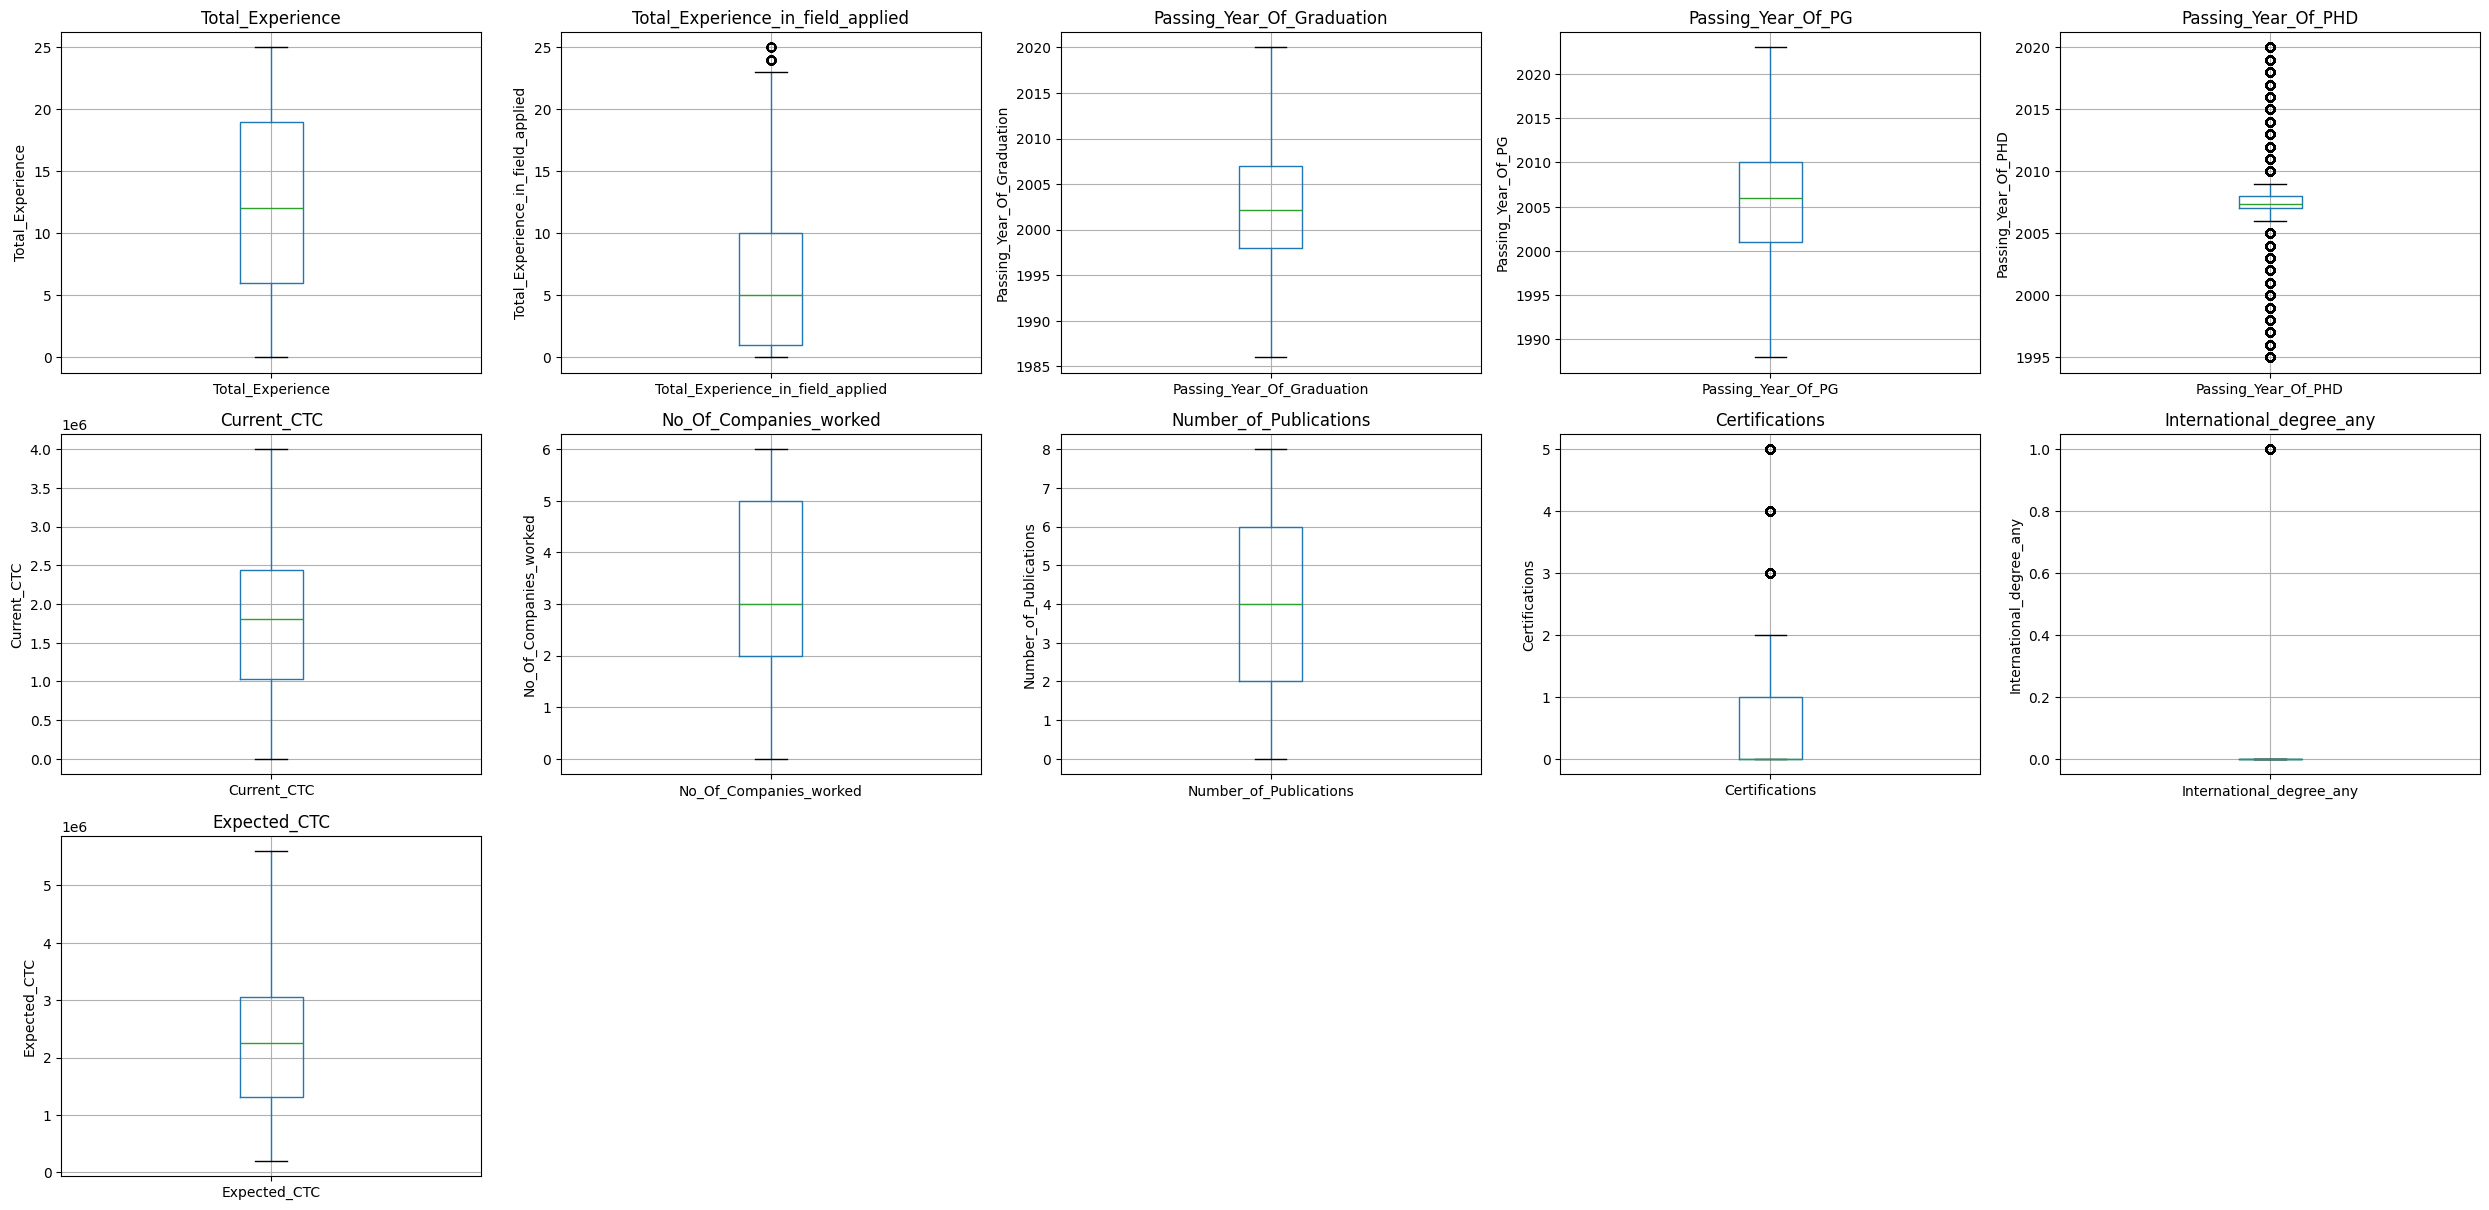

In [13]:
# Checking for Outliers in Numerical Columns
plt.figure(figsize=(25, 20))
num_cols = df.select_dtypes(include=np.number).columns

for i, column in enumerate(num_cols):
    plt.subplot(5, 5, i + 1)
    df.boxplot(column=column)
    plt.title(column)
    plt.ylabel(column)

plt.tight_layout()
plt.show()





In [14]:
#Removing Outliers
def remove_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range=Q1-(1.5*IQR)
  upper_range=Q3+(1.5*IQR)
  return lower_range,upper_range

for i in num_cols:
    lower,upper=remove_outlier(df[i])
    df[i]=np.where(df[i]<lower,lower,df[i])
    df[i]=np.where(df[i]>upper,upper,df[i])

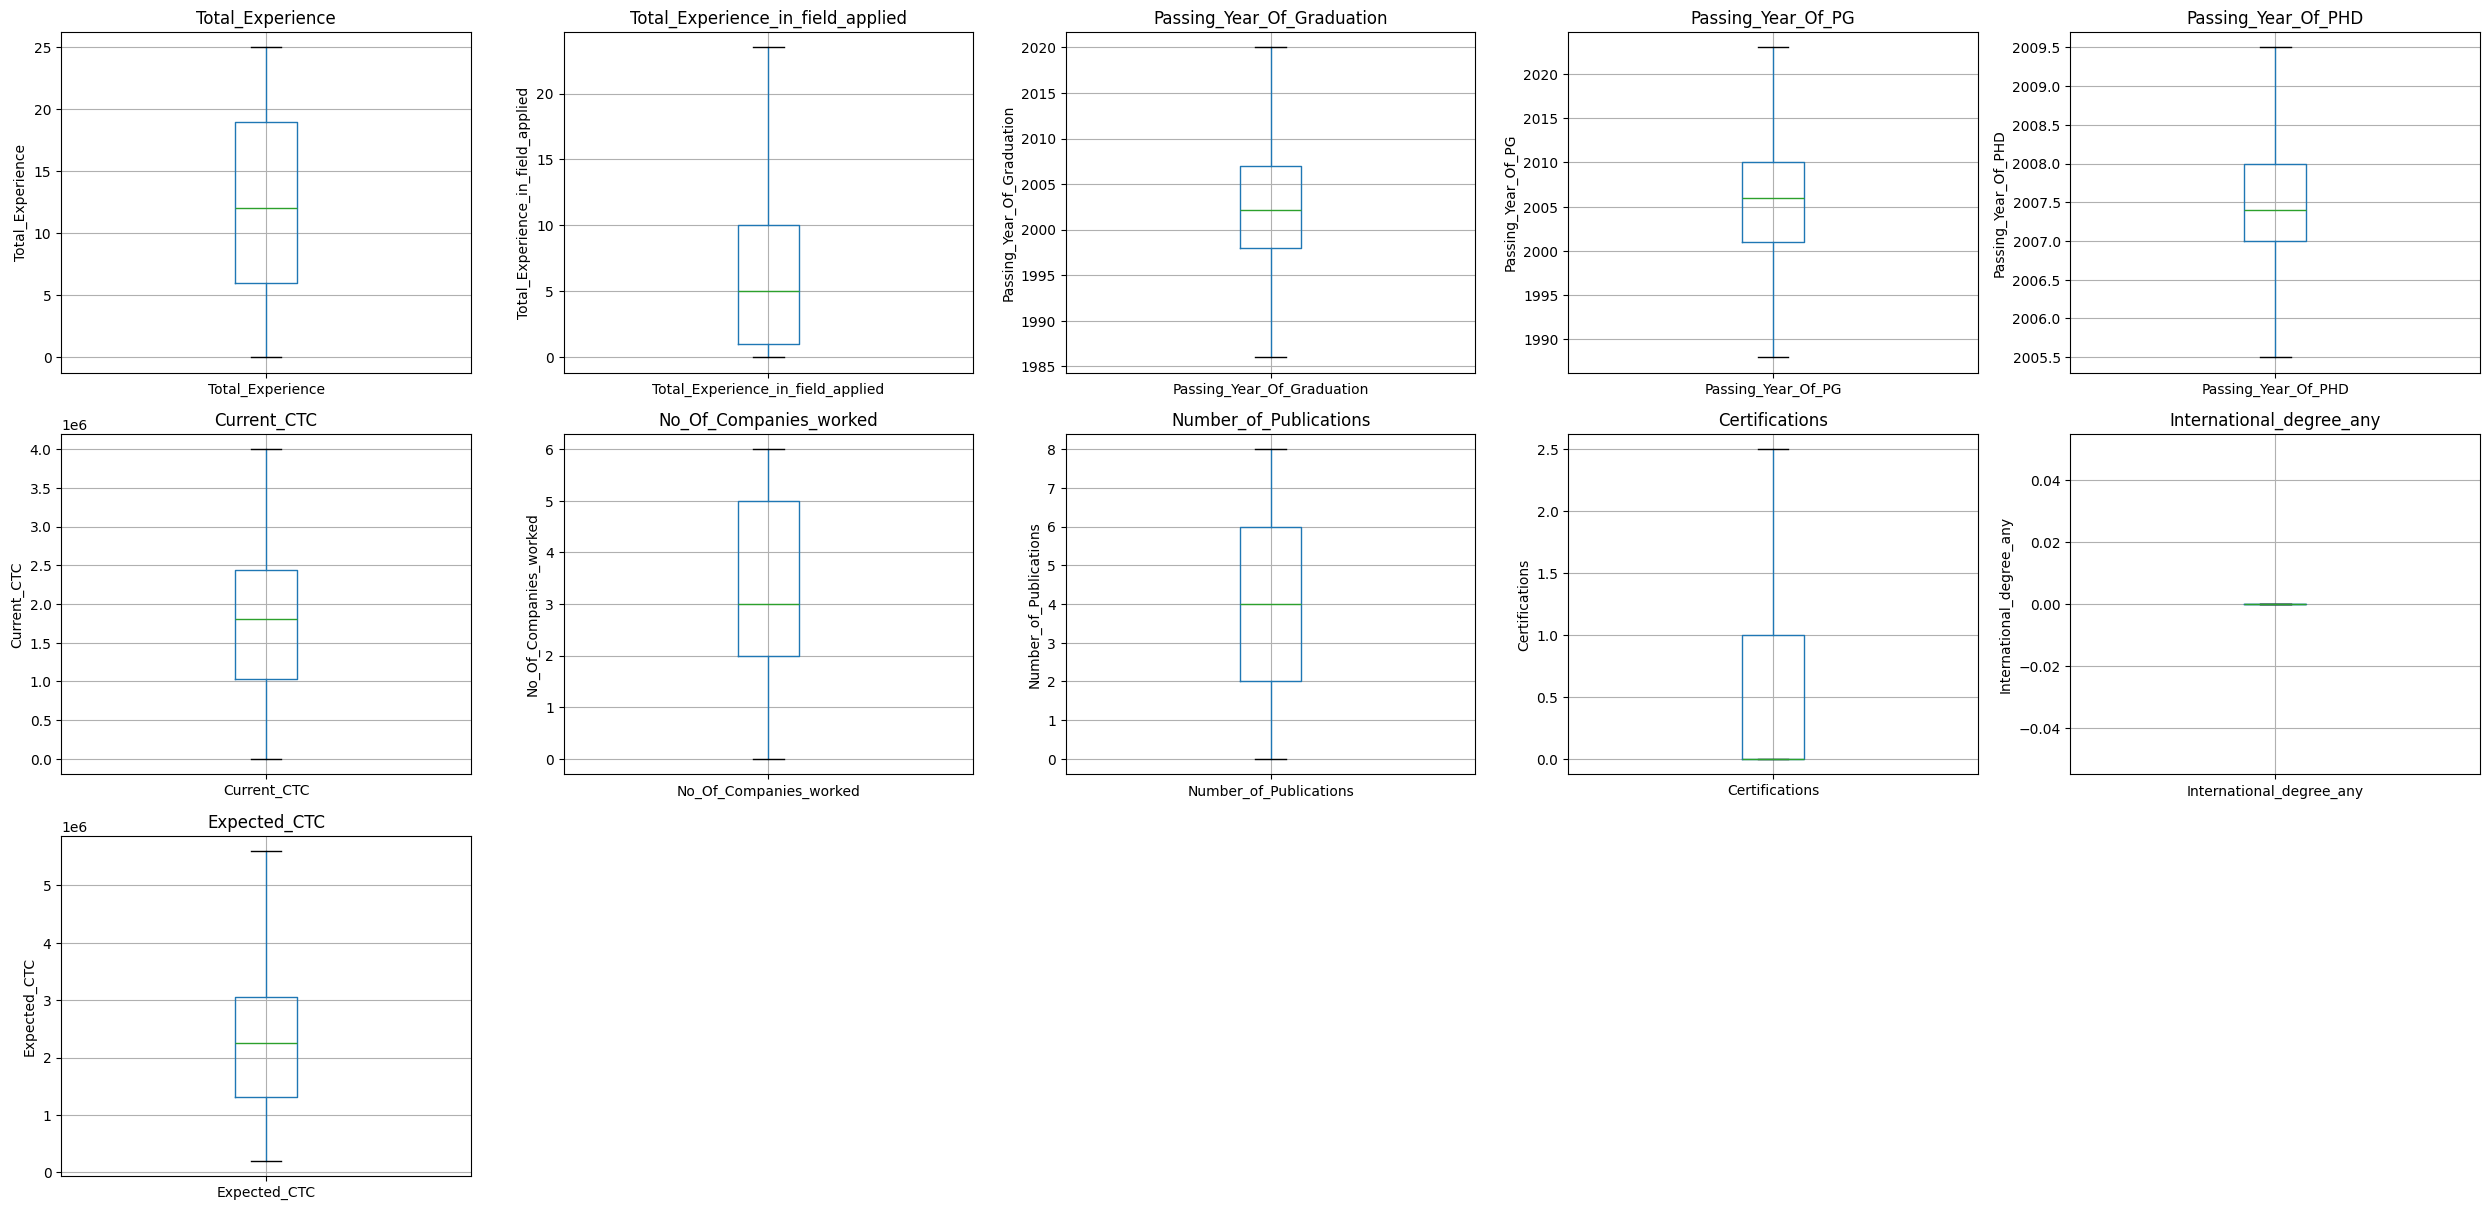

In [15]:
#Checking For Outliers After Treatment
plt.figure(figsize=(25, 20))
num_cols = df.select_dtypes(include=np.number).columns

for i, column in enumerate(num_cols):
    plt.subplot(5, 5, i + 1)
    df.boxplot(column=column)
    plt.title(column)
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [16]:
# Univariate Analysis 

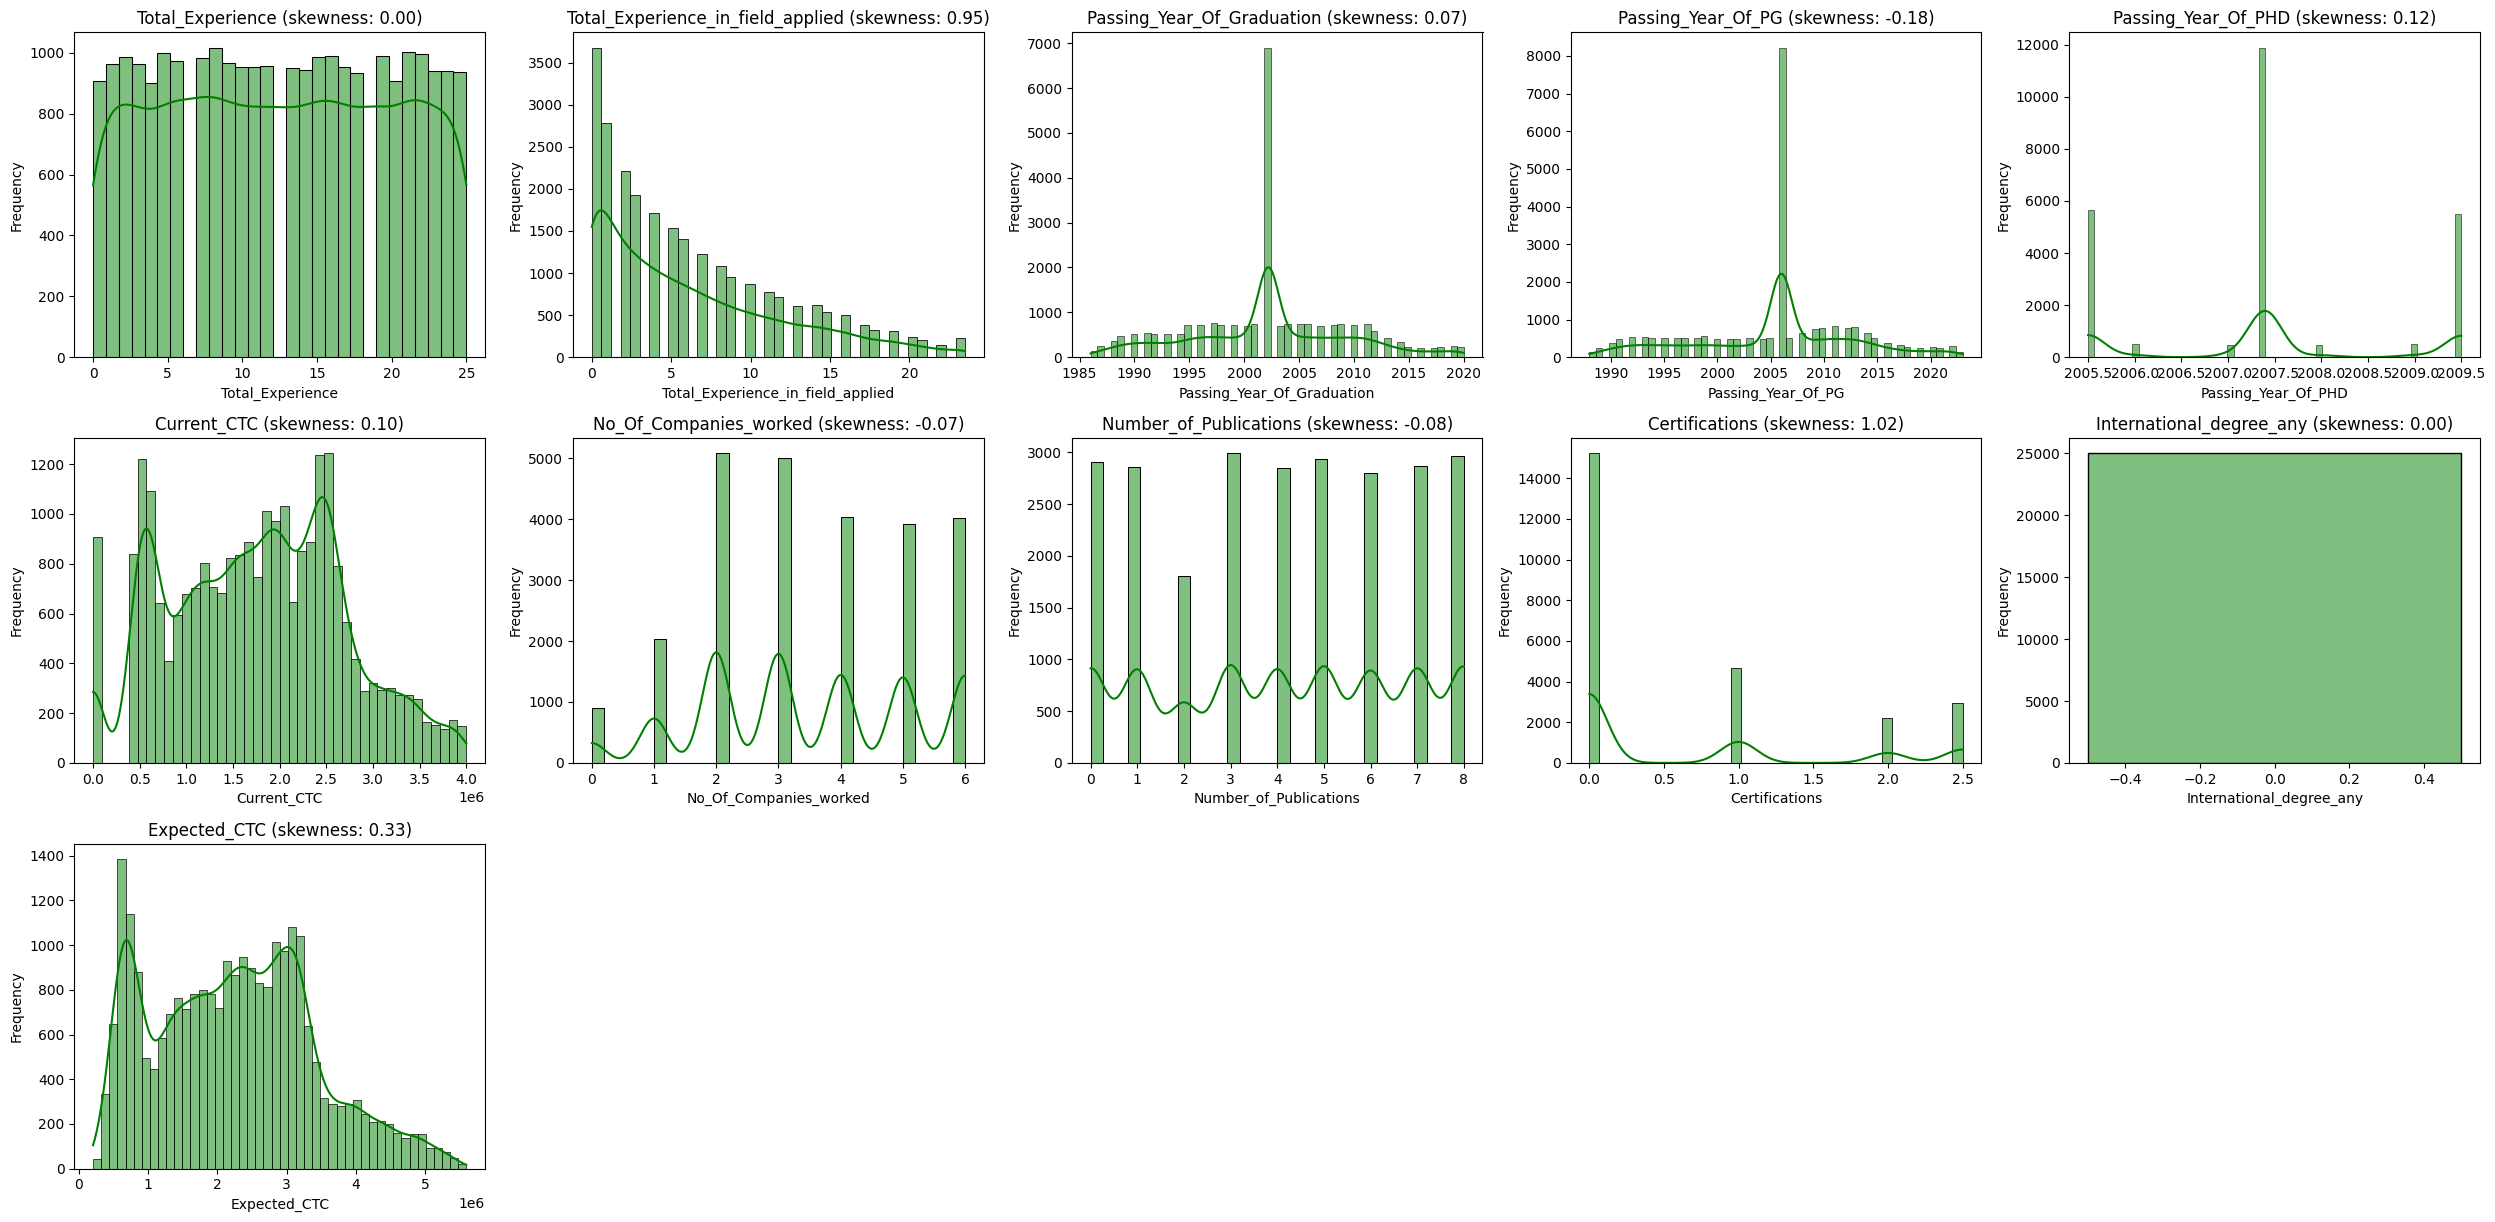

In [17]:
#For Numerical Columns with skewness
num_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(25, 20))
for i, column in enumerate(num_cols):
    plt.subplot(5, 5, i + 1)
    sns.histplot(df[column], kde=True, color='green')
    plt.title(f'{column} (skewness: {df[column].skew():.2f})')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

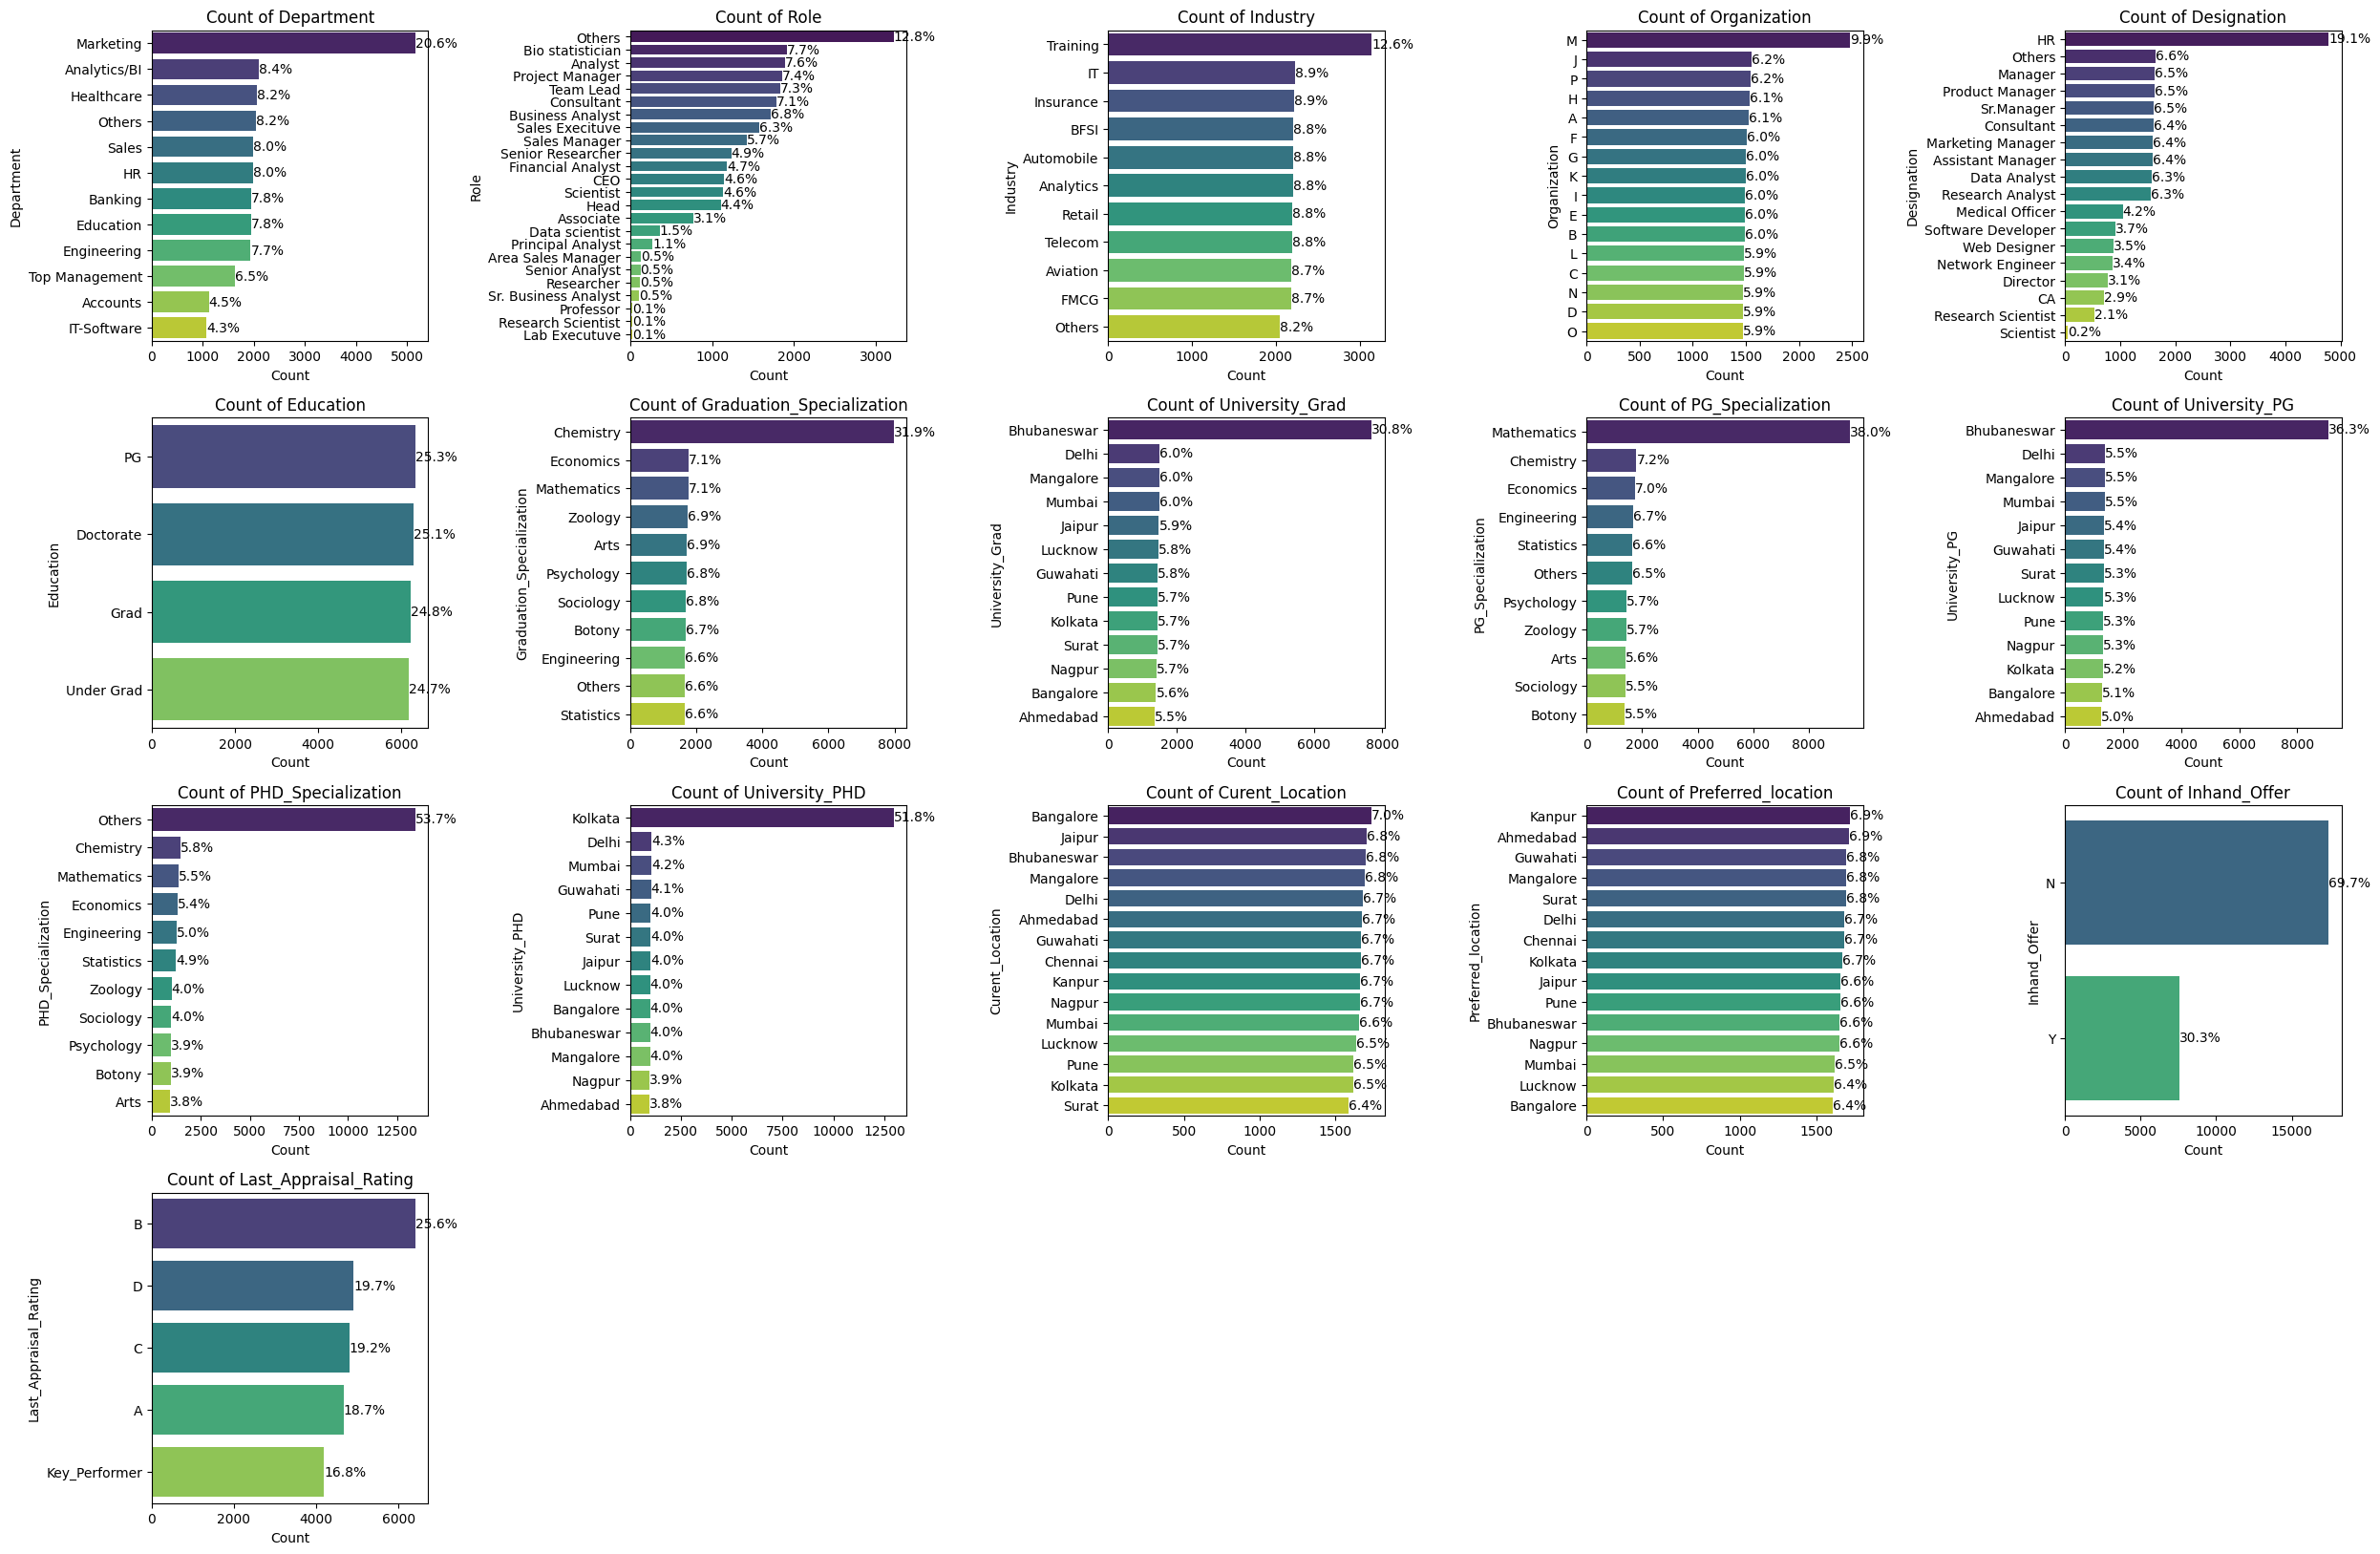

In [18]:
# For Categorical Columns Using Count Plots with Percentage Annotations

cat_cols = df.select_dtypes(include='object').columns
plt.figure(figsize=(25, 20))
for i, column in enumerate(cat_cols):
    plt.subplot(5, 5, i + 1)
    sns.countplot(y=df[column], order=df[column].value_counts().index, palette='viridis')
    total = len(df[column])
    #Annotate percentages on bars
    for p in plt.gca().patches:
        percentage = f'{100 * p.get_width() / total:.1f}%'
        plt.gca().annotate(percentage, (p.get_width(), p.get_y() + p.get_height() / 2), 
                           ha='left', va='center')  
         
    plt.title(f'Count of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)  
plt.tight_layout()
plt.show()

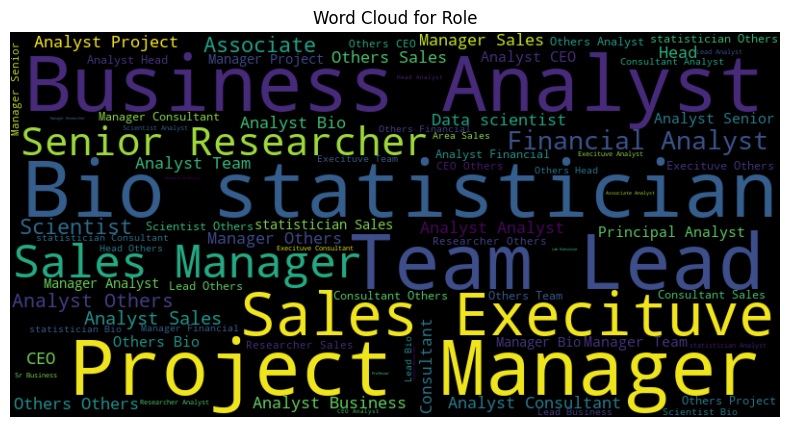

In [19]:
#WordCloud Analysis For 'Role'
from wordcloud import WordCloud
role_text = ' '.join(df['Role'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='Black').generate(role_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Role')
plt.show()


In [20]:
#Bivariate Analysis

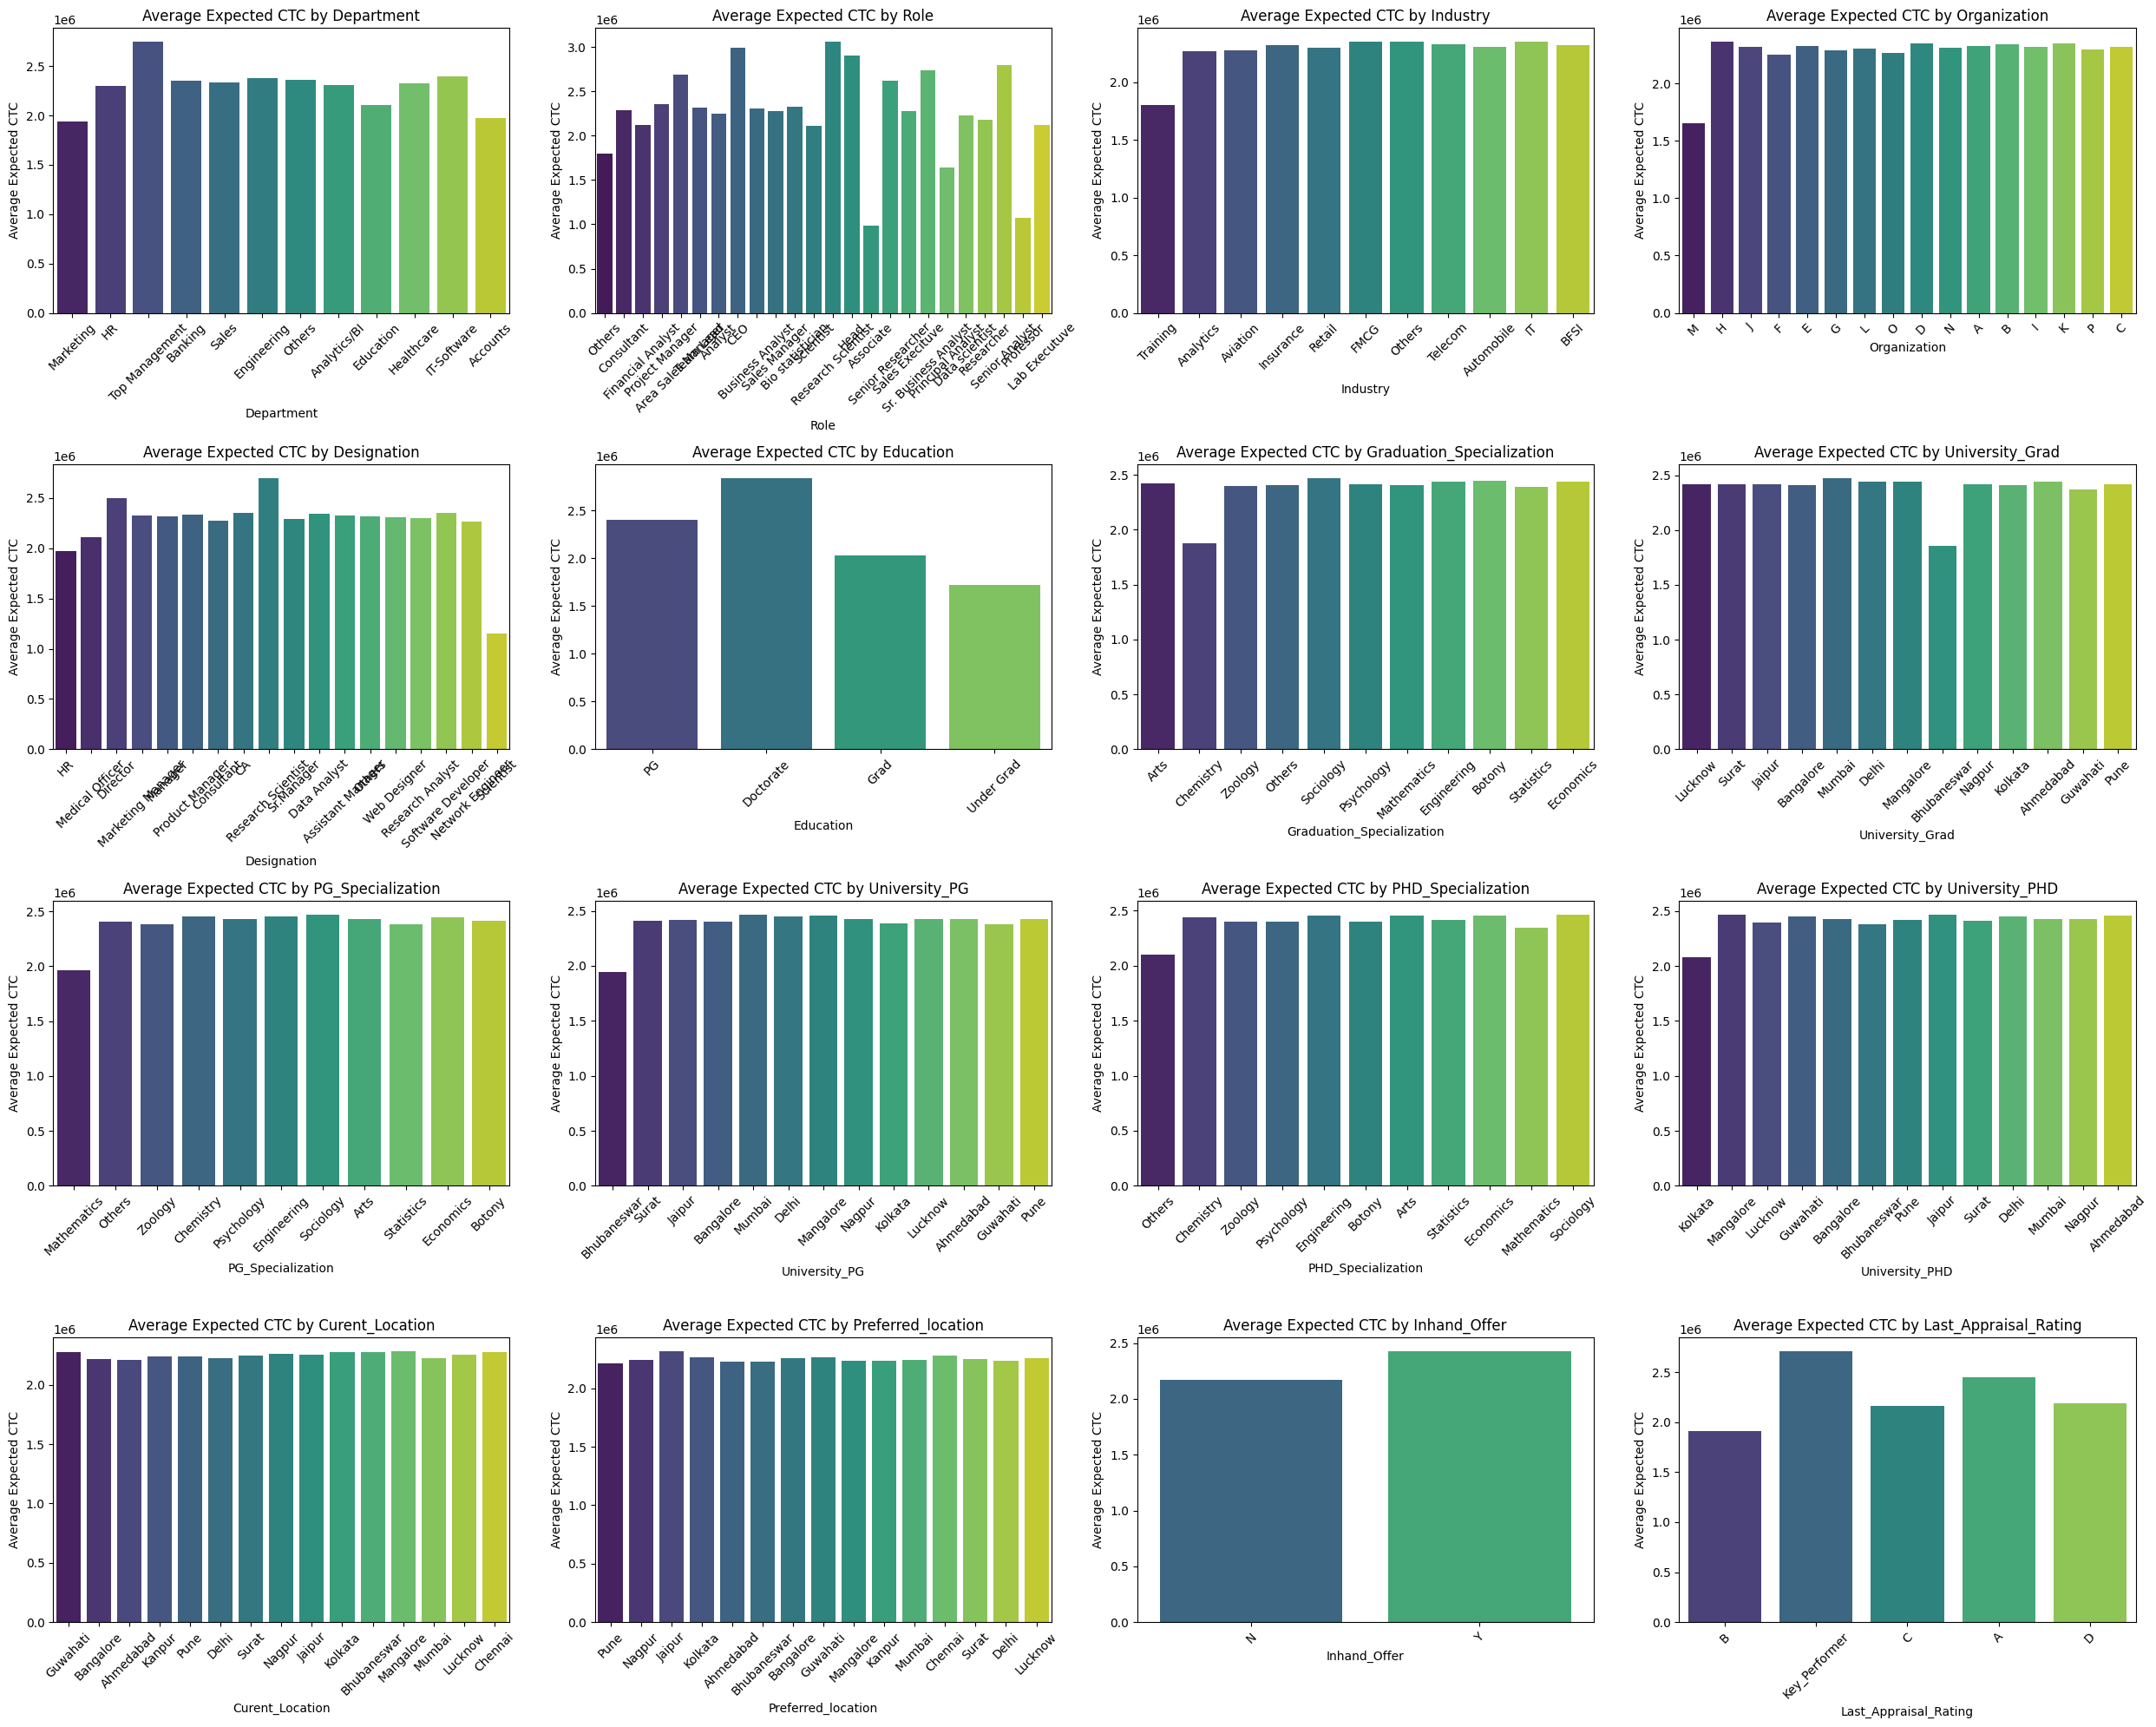

In [21]:
# Comparing Expected CTC Based on Different Categorical Features Using Bar Plots
cat_cols = df.select_dtypes(include='object').columns

plt.figure(figsize=(25, 20))
for i, column in enumerate(cat_cols):
    plt.subplot(4,4, i + 1)
    sns.barplot(x=df[column], y=df['Expected_CTC'], errorbar=None, palette='viridis')
    plt.title(f'Average Expected CTC by {column}')
    plt.xlabel(column)
    plt.ylabel('Average Expected CTC')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


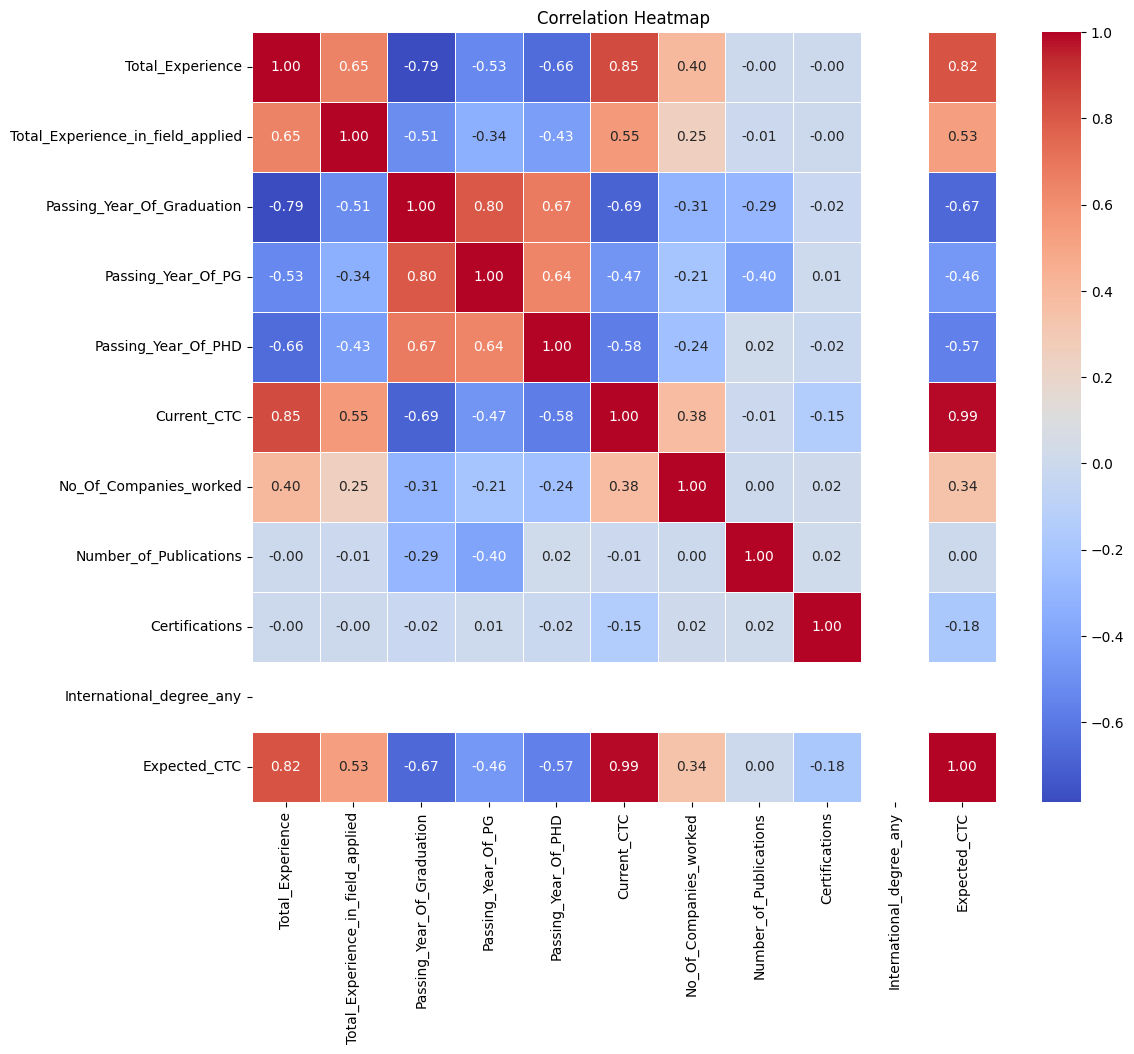

In [22]:
#Correlation Heatmap for numerical features
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=[np.number])
data = numeric_df.corr()
sns.heatmap(data, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [23]:
# Encoding all Categorical values using LabelEncoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_cols=df.select_dtypes(include='object').columns
for col in cat_cols:
    
    df[col]=le.fit_transform(df[col])
df.head()

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,University_Grad,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0.0,0.0,8,11,10,12,5,2,0,7,...,5,13,0.0,0,1,0.0,0.0,0.0,0.0,384551.0
1,23.0,14.0,5,6,0,7,5,0,2,12,...,1,12,2702664.0,1,4,2.0,4.0,0.0,0.0,3783729.0
2,21.0,12.0,11,6,10,9,5,0,10,5,...,0,6,2236661.0,1,4,5.0,3.0,0.0,0.0,3131325.0
3,15.0,8.0,2,8,2,5,5,0,6,1,...,7,8,2100510.0,0,2,5.0,3.0,0.0,0.0,2608833.0
4,10.0,5.0,10,14,6,4,8,1,10,9,...,0,0,1931644.0,0,2,2.0,3.0,0.0,0.0,2221390.0


In [24]:
#Saving the labelencoder for deployment purposes
import joblib
joblib.dump(le, 'labelencoder1.pkl')


['labelencoder1.pkl']

In [25]:
#Setting Features and Target
X=df.drop('Expected_CTC',axis=1)
y=df['Expected_CTC']

In [26]:
#Feature Scaling using StandardScaler on X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in X.columns:
    X[col]=scaler.fit_transform(X[[col]])

In [27]:
#saving the scaler for deployment purposes
joblib.dump(scaler, 'scaler2.pkl')

['scaler2.pkl']

In [28]:
#Train Test Split on X and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)   


In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17500, 26), (7500, 26), (17500,), (7500,))

In [35]:
#Model Building

In [36]:
# 1. Random Forest Regressor with Hyperparameter Tuning using GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],                # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],                # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                # Min samples to split an internal node
    'min_samples_leaf': [1, 2, 4],                  # Min samples at a leaf node
    'max_features': ['sqrt', 'log2', None]          # Number of features to consider at each split
}
Random_Forest = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
Random_Forest.fit(X_train, y_train)
print('Best Estimator:', Random_Forest.best_estimator_)
print('Best Parameters:', Random_Forest.best_params_)
print('Best Score:', Random_Forest.best_score_)


Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Estimator: RandomForestRegressor(max_depth=30, max_features=None, n_estimators=300,
                      random_state=42)
Best Parameters: {'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.9993122453767446
Best Estimator: RandomForestRegressor(max_depth=30, max_features=None, n_estimators=300,
                      random_state=42)
Best Parameters: {'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.9993122453767446


In [37]:
#Saving Random Forest Model for further use
import joblib
joblib.dump(Random_Forest, 'Random_Forest_Model.pkl')

['Random_Forest_Model.pkl']

In [38]:
#XGBBoost Regressor with Hyperparameter Tuning using GridSearchCV
from xgboost import XGBRegressor
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
param_grid = {
    'n_estimators': [100, 200],             # Number of trees
    'max_depth': [3, 6, 10],                # Maximum depth of a tree (XGBoost uses integers, not None)
    'learning_rate': [0.01, 0.1, 0.2],      # Step size shrinkage
    'subsample': [0.7, 1.0],                # Fraction of samples used for training each tree
    'colsample_bytree': [0.7, 1.0]          # Fraction of features used for training each tree
}
XGB_Model = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
XGB_Model.fit(X_train, y_train)
print('Best Estimator:', XGB_Model.best_estimator_)
print('Best Parameters:', XGB_Model.best_params_)
print('Best Score:', XGB_Model.best_score_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Estimator: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}
Best Score: 0.9995850787499795
Best Estimator: XGBRegressor(bas

In [39]:
#Saving XGB Model for further use

joblib.dump(XGB_Model, 'XGB_Model.pkl')

['XGB_Model.pkl']

In [40]:
#LightGBM Regressor with Hyperparameter Tuning using GridSearchCV
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(random_state=42, verbose=-1)  # verbose=-1 suppresses warnings
param_grid = {
    'n_estimators': [100, 200],             # Number of trees
    'max_depth': [10, 20, -1],              # Maximum depth of a tree (-1 means no limit in LightGBM)
    'learning_rate': [0.01, 0.1, 0.2],      # Step size shrinkage
    'subsample': [0.7, 1.0],                # Fraction of samples used for training each tree (also called bagging_fraction)
    'colsample_bytree': [0.7, 1.0]          # Fraction of features used for training each tree (also called feature_fraction)
}
LGBM_Model = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
LGBM_Model.fit(X_train, y_train)
print('Best Estimator:', LGBM_Model.best_estimator_)
print('Best Parameters:', LGBM_Model.best_params_)
print('Best Score:', LGBM_Model.best_score_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Estimator: LGBMRegressor(max_depth=10, n_estimators=200, random_state=42, subsample=0.7,
              verbose=-1)
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.7}
Best Score: 0.9995841300776961
Best Estimator: LGBMRegressor(max_depth=10, n_estimators=200, random_state=42, subsample=0.7,
              verbose=-1)
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.7}
Best Score: 0.9995841300776961


In [41]:
#Saving LGBM Model for further use
joblib.dump(LGBM_Model, 'LGBM_Model.pkl')

['LGBM_Model.pkl']

In [53]:
#Ridgel Regression with Hyperparameter Tuning using GridSearchCV As a baseline for Stacking Regressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
Ridge_Model = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, n_jobs=-1)
Ridge_Model.fit(X_train, y_train)
print('Best Ridge Alpha:', Ridge_Model.best_params_['alpha'])   


Best Ridge Alpha: 0.1


In [54]:
#Combining all three models using Stacking Regressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

estimators = [
    ('rf', Random_Forest.best_estimator_),
    ('xgb', XGB_Model.best_estimator_),
    ('lgbm', LGBM_Model.best_estimator_)
]

# Use the best alpha from Ridge tuning 
best_alpha = Ridge_Model.best_params_['alpha'] 

stacking_regressor = StackingRegressor(
    estimators=estimators,                         # List of base models
    final_estimator=Ridge(alpha=best_alpha),       # Meta-model with optimized alpha
    cv=5                                           # Use 5-fold cross-validation for meta-model training
)

print(f"Training Stacking Regressor with Ridge alpha={best_alpha}...")
stacking_regressor.fit(X_train, y_train)

Training Stacking Regressor with Ridge alpha=0.1...


StackingRegressor(cv=5,
                  estimators=[('rf',
                               RandomForestRegressor(max_depth=30,
                                                     max_features=None,
                                                     n_estimators=300,
                                                     random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=1.0, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_ty...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                              ('lgbm',
                               LGBMRegressor(max_depth=10, n_estimators=200,
                                             random_state=42, subsample=0.7,
                                             verbose=-1))],
                  final_estimator=Ridge(alpha=0.1))

In [55]:
#Saving the combined model (stacking regressor) for further use
joblib.dump(stacking_regressor, 'Stacking_Regressor_Model.pkl')


['Stacking_Regressor_Model.pkl']

In [42]:
#Comparing Models using R2 Score, RMSE and checking for overfitting and underfitting
from sklearn.metrics import r2_score, mean_squared_error
model_files = [
    'Random_Forest_Model.pkl', 
    'XGB_Model.pkl',
    'LGBM_Model.pkl',
    'Stacking_Regressor_Model.pkl'
]

results = {}

for file in model_files:
    model = joblib.load(file)
    name = file.replace('_Model.pkl', '')
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    #train data
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    #test data
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Store results
    results[name] = {
        'Train R2': train_r2,
        'Test R2': test_r2,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse
    }
    print(f"Evaluated {name}")

#converting to dataframe

results_df = pd.DataFrame.from_dict(results, orient='index')

print("Model Performance Comparison")
print(results_df)

Evaluated Random_Forest
Evaluated XGB
Evaluated LGBM
Evaluated Stacking_Regressor
Model Performance Comparison
                    Train R2   Test R2    Train RMSE     Test RMSE
Random_Forest       0.999929  0.999479   9816.166039  26413.445729
XGB                 0.999892  0.999673  12093.428556  20904.735288
LGBM                0.999841  0.999685  14664.733526  20514.922637
Stacking_Regressor  0.999909  0.999731  11079.329721  18988.090784


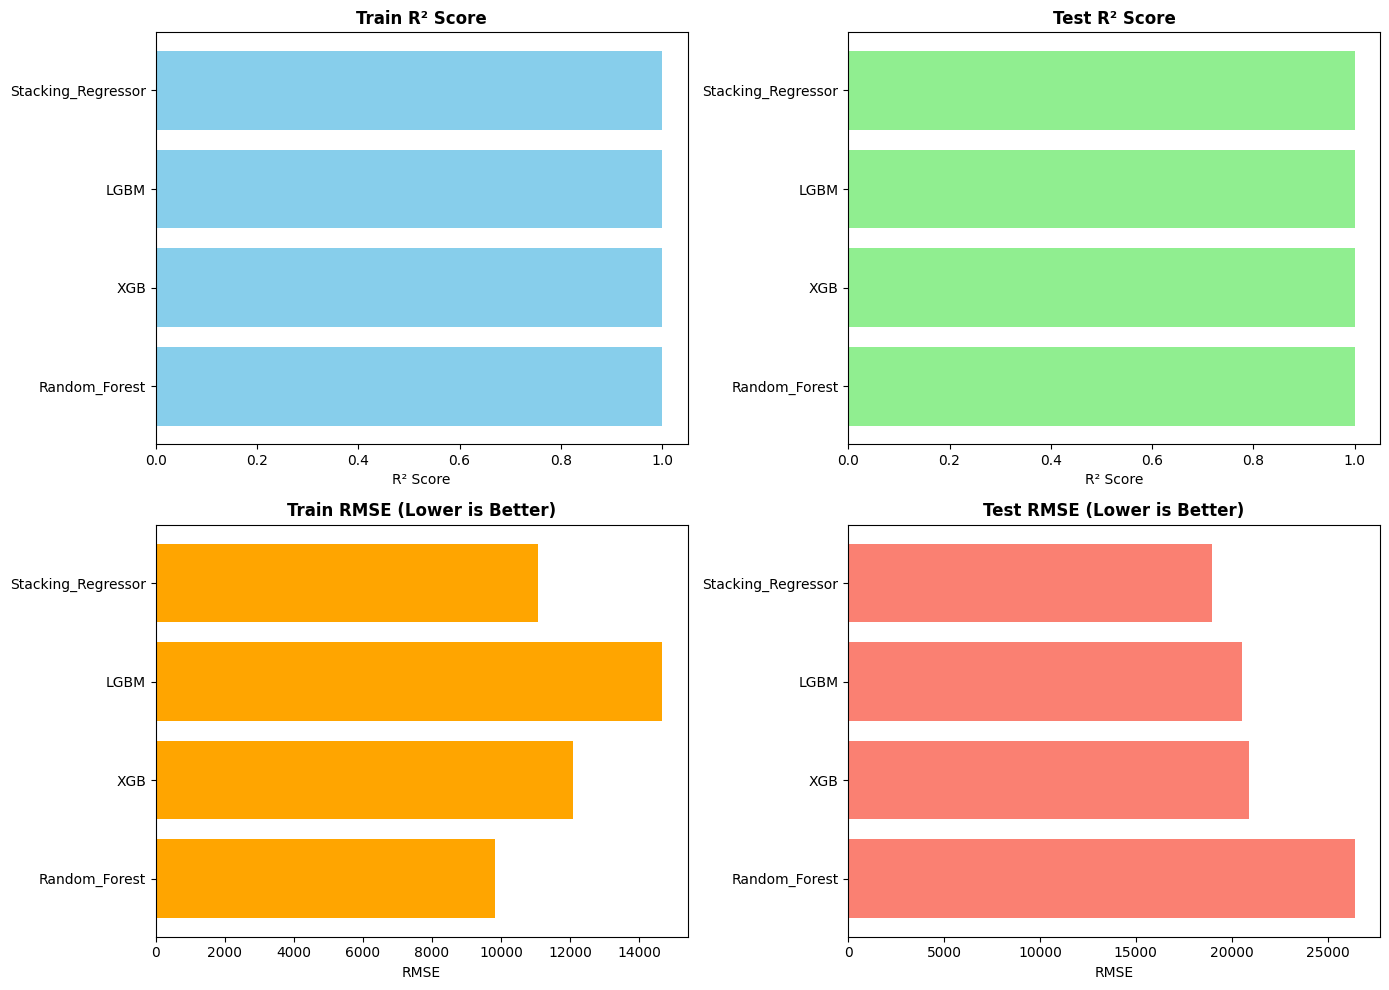


🏆 Best Model: Stacking_Regressor
   Test R²: 0.999731
   Test RMSE: 18988.09


In [47]:
#Visualizing results_df with simple bar plots

# Convert index to column
results_df_plot = results_df.reset_index()
results_df_plot.columns = ['Model', 'Train R2', 'Test R2', 'Train RMSE', 'Test RMSE']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Train R2 Score
axes[0, 0].barh(results_df_plot['Model'], results_df_plot['Train R2'], color='skyblue')
axes[0, 0].set_title('Train R² Score', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('R² Score')

# Plot 2: Test R2 Score
axes[0, 1].barh(results_df_plot['Model'], results_df_plot['Test R2'], color='lightgreen')
axes[0, 1].set_title('Test R² Score', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('R² Score')

# Plot 3: Train RMSE
axes[1, 0].barh(results_df_plot['Model'], results_df_plot['Train RMSE'], color='orange')
axes[1, 0].set_title('Train RMSE (Lower is Better)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('RMSE')

# Plot 4: Test RMSE
axes[1, 1].barh(results_df_plot['Model'], results_df_plot['Test RMSE'], color='salmon')
axes[1, 1].set_title('Test RMSE (Lower is Better)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('RMSE')

plt.tight_layout()
plt.show()

# Print best model
print("\n🏆 Best Model: Stacking_Regressor")
print(f"   Test R²: {results_df.loc['Stacking_Regressor', 'Test R2']:.6f}")
print(f"   Test RMSE: {results_df.loc['Stacking_Regressor', 'Test RMSE']:.2f}")
